Load in the PWM file Dan used

In [1]:
motifs_file = "/mnt/lab_data/kundaje/users/dskim89/ggr/integrative/v1.0.0a/annotations/HOCOMOCOv11_core_pwms_HUMAN_mono.renamed.nonredundant.txt"
motif_order = [x[1:].rstrip() for x in open(motifs_file)
               if x.startswith(">")]

In [2]:
motif_name_to_index = dict([(x[1], x[0]) for x in enumerate(motif_order)])

View the enrichments of different PWMs across time (computed by Dan)

In [3]:
pwm_scores = "/mnt/lab_data/kundaje/users/dskim89/ggr/nn/inference.2019-03-12/motifs.sig/motifs.adjust.diff.rna_filt.dmim/summary/ggr.pwms_present_summary.txt"

In [4]:
import numpy as np
motif_names = []
matrix = []
for rowidx, row in enumerate(open(pwm_scores)):
    if (rowidx==0):
        colnames = row.rstrip().split("\t")[1:]
    else:
        splitrow = row.strip().split("\t")
        motif_names.append(splitrow[0])
        matrix.append([float(x) for x in splitrow[1:]])
matrix = np.array(matrix)

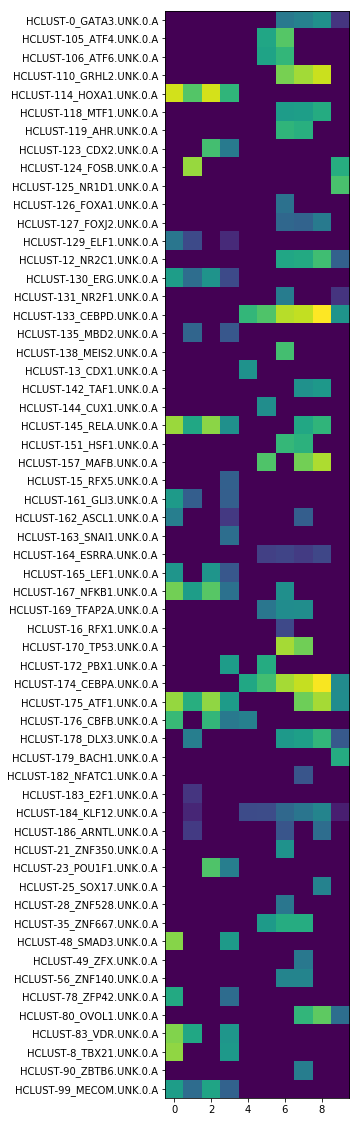

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(matrix)
plt.yticks(np.arange(len(motif_names)))
plt.gca().set_yticklabels(motif_names)
plt.show()

Pick a motif and a task to look at

In [6]:
motif_to_look_at = "HCLUST-0_GATA3.UNK.0.A"
task_to_look_at = 9
motif_idx = motif_name_to_index[motif_to_look_at]

Load in Dan's thresholded scores for that motif and task, visualize

In [7]:
import h5py
ggr_scanmotifs_scores = "/mnt/lab_data/kundaje/users/dskim89/ggr/nn/inference.2019-02-05/motifs.input_x_grad.late/ggr.scanmotifs.h5"
f = h5py.File(ggr_scanmotifs_scores)
scores_for_task_and_motif = f["sequence-weighted.active.pwm-scores.thresh"][:,task_to_look_at,:,motif_idx]

In [8]:
#sort the sequences in order of the max score for the motif
maxscore_seq_indices =(
    sorted(enumerate(np.max(scores_for_task_and_motif, axis=-1)),
           key=lambda x: -x[1]))                                

TF-MoDISco is using the TensorFlow backend.


index 9699


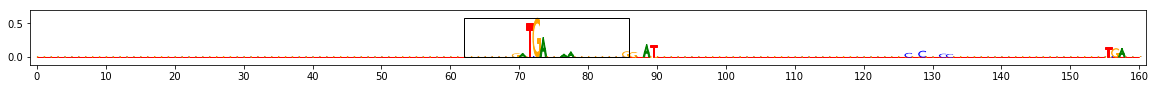

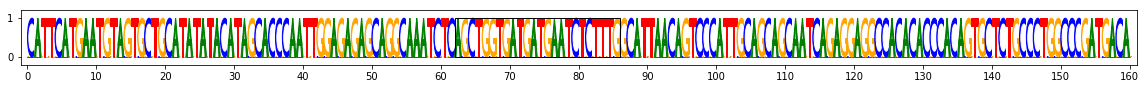

index 17682


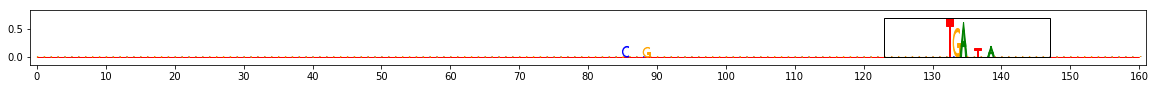

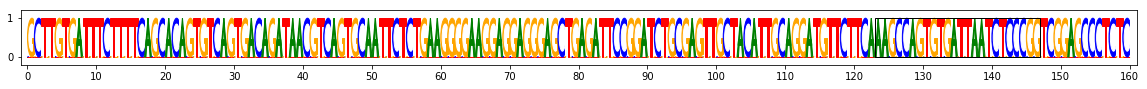

index 9682


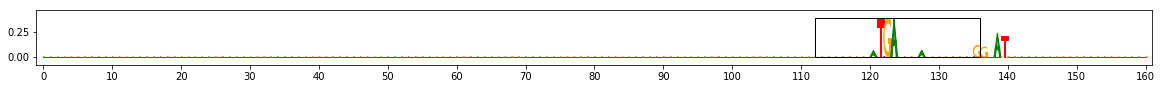

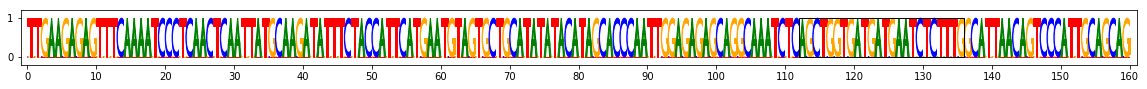

index 16884


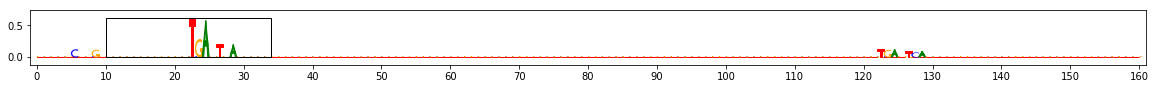

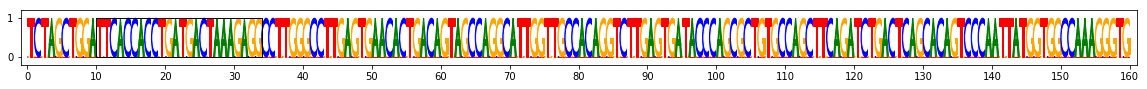

index 10732


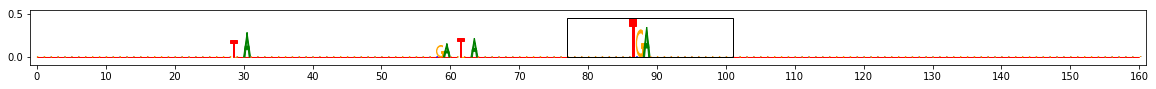

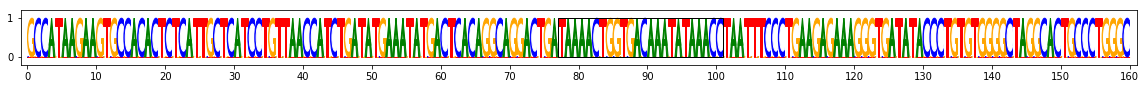

index 2256


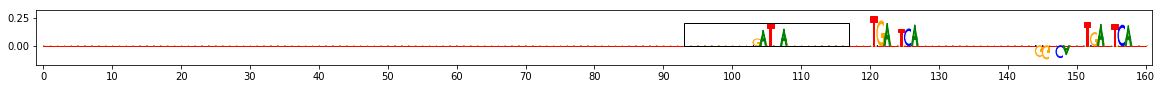

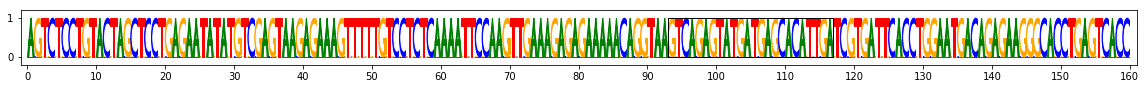

index 7890


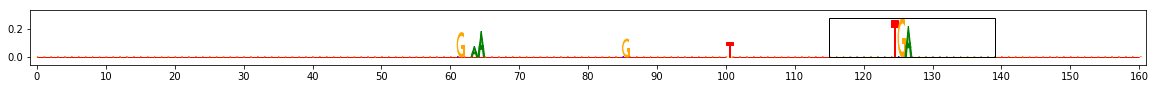

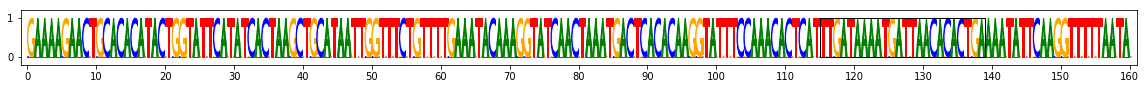

index 17000


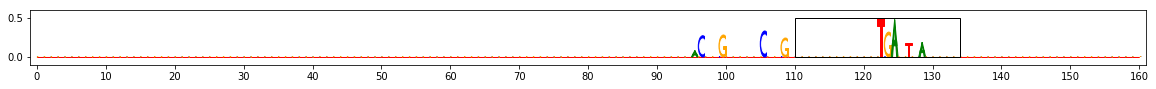

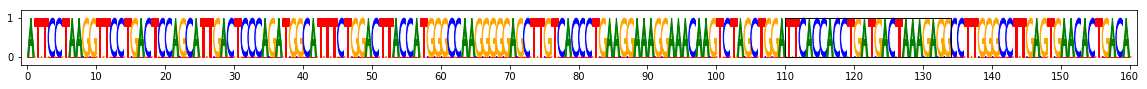

index 98


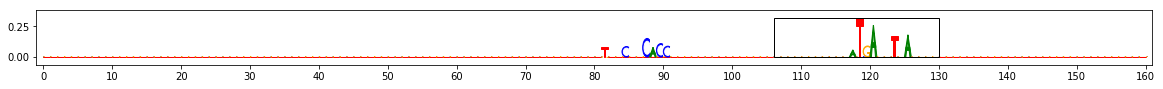

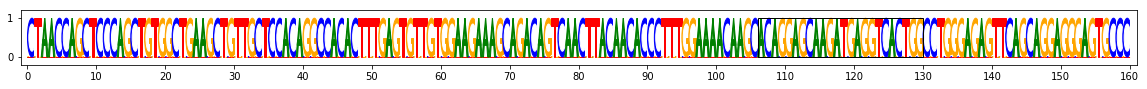

index 4895


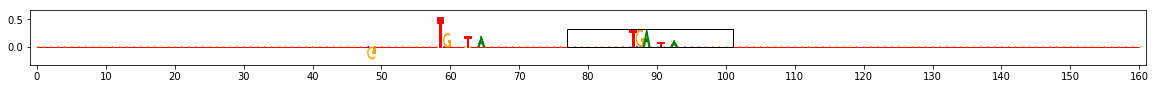

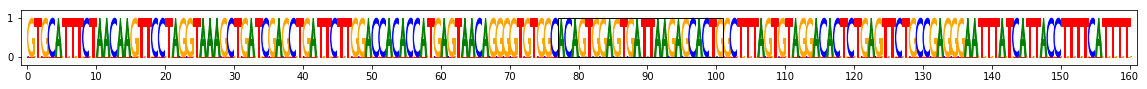

In [9]:
#visualize the first 10
from modisco.visualization import viz_sequence
for idx, max_score in maxscore_seq_indices[:10]:
    print("index",idx)
    max_idx = np.argmax(
        f["sequence-weighted.active.pwm-scores.thresh"][idx,task_to_look_at,:,motif_idx])
    viz_sequence.plot_weights(f["sequence-weighted.active"][
        idx,task_to_look_at], highlight={"black": [(max_idx,max_idx+24)]},
        subticks_frequency=10, figsize=(20,1))
    viz_sequence.plot_weights(f["sequence.active"][
        idx], highlight={"black": [(max_idx,max_idx+24)]},
        subticks_frequency=10, figsize=(20,1))